# MELANOMA DETECTION
__To build a CNN based model which can accurately detect melanoma.__

## PROBLEM STATEMENT : 
- __Melanoma__ is a type of cancer that can be deadly if not detected early. 
- It accounts for __75%__ of skin cancer deaths. 
- A solution which can evaluate images and alert the dermatologists about the __presence of melanoma__ has the potential to __reduce a lot of manual effort__ needed in diagnosis.
- The dataset consists of __2357 images of malignant and benign oncological diseases__, which were formed from the International Skin Imaging Collaboration __(ISIC)__. 
- All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


#### The data set contains the following diseases:
- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Import required libraries

In [60]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

### Import Skin Cancer Data

In [2]:
'''# When using the data by mounting google drive, use the following :

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/'''

"# When using the data by mounting google drive, use the following :\n\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\nroot_path = 'gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/"

In [3]:
# Defining the path for train and test images

root_path = 'C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/'
data_dir_train = pathlib.Path(root_path+'Train/')
data_dir_test = pathlib.Path(root_path+'Test/')

In [4]:
# Number of images in the train and test set

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


- Dataset contains about __2357 images__ of skin cancer types. 
- It contains __9 sub-directories__ in each train and test subdirectories.
- The 9 sub-directories contains the images of __9 skin cancer types__ respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

In [5]:
# Define some parameters for the loader

batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

__Using 80% of the images for training, and 20% for validation.__

In [6]:
# TRAIN DATASET
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width, while writing the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# VALIDATION DATASET
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width, while writing the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# We can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data


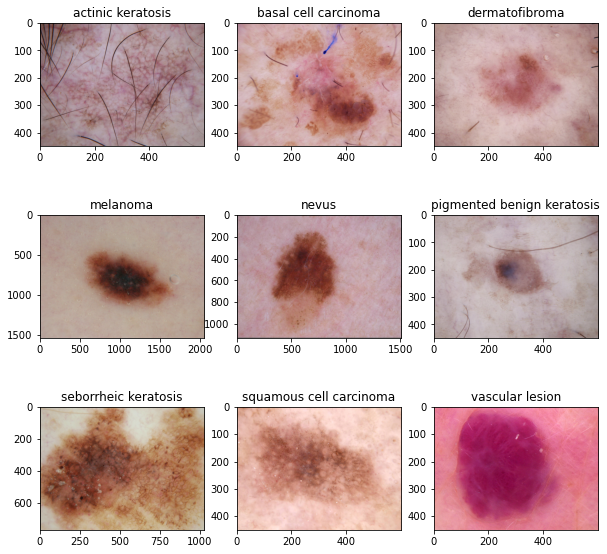

In [9]:
# Visualizing sample image from each class

plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## MODEL 1 : 
### Create the model

In [11]:
# Create a CNN model
# Using layers.experimental.preprocessing.Rescaling, normalize pixel values between (0,1)

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 4th convolution layer 
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))

# Fully connected layer 2
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Optimiser chosen in __Adam__ and the loss function used for model training is __SparseCategoricalCrossentropy__.

In [12]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
# Train the model for 20 epochs 

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 365ms/step - loss: 2.0402 - accuracy: 0.2026 - val_loss: 1.9547 - val_accuracy: 0.2685
Epoch 2/20
56/56 [==============================] - 20s 363ms/step - loss: 1.8004 - accuracy: 0.3426 - val_loss: 1.7476 - val_accuracy: 0.3691
Epoch 3/20
56/56 [==============================] - 20s 357ms/step - loss: 1.5686 - accuracy: 0.4336 - val_loss: 1.5242 - val_accuracy: 0.4407
Epoch 4/20
56/56 [==============================] - 20s 352ms/step - loss: 1.4055 - accuracy: 0.5011 - val_loss: 1.3892 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 20s 351ms/step - loss: 1.3639 - accuracy: 0.5151 - val_loss: 1.4403 - val_accuracy: 0.4899
Epoch 6/20
56/56 [==============================] - 20s 352ms/step - loss: 1.3046 - accuracy: 0.5441 - val_loss: 1.4137 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 21s 376ms/step - loss: 1.2451 - accuracy: 0.5580 - val_loss: 1.3528 - val_accuracy: 0.5235

### Visualize the results

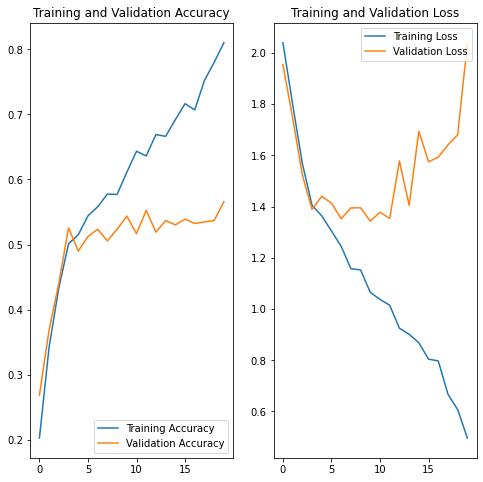

In [15]:
# Visualize the results 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### INFERENCES :
- __Training accuracy__ increases as the number of epochs increase wheras __validation accuracy__ increases only for a first few epochs but then starts fluctuating and also the difference between training accuracy and validation accuracy is huge.
- Also, __training loss__ seems to decline with increase in epochs whereas __validation loss__ increases after some epochs.
- __Training accuracy : ~ 0.81__
- __Validation accuracy : ~ 0.56__
- These observations are a clear evidence of __OVERFITTING__.
- Thus, to prevent overfitting let us use __data augmentation__ along with __Dropout layers__ and __L2 regularizers__.

### DATA AUGMENTATION

In [16]:
# Since the model overfits, data augumentation strategy is used
# Data augmentation is artificially increasing the amount of data needed to train robust AI models

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",
                                                                          input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')
])

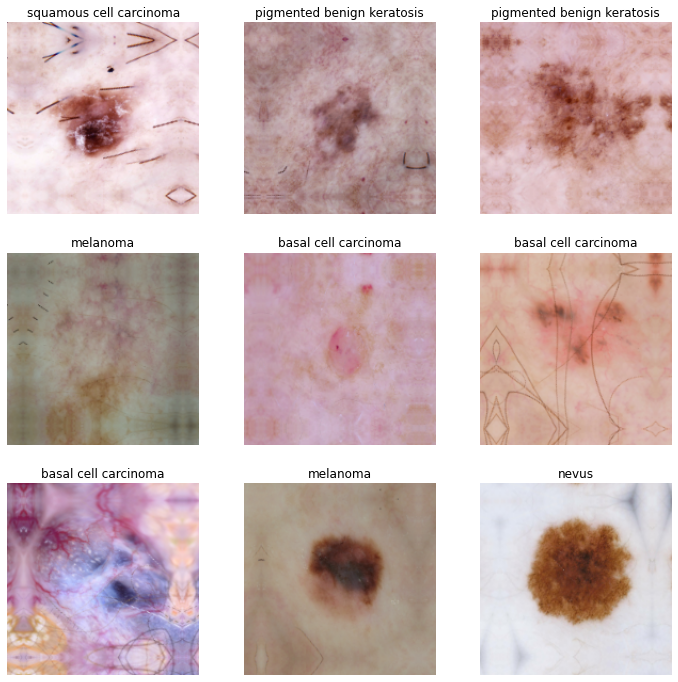

In [17]:
# Visualize the augmentation strategy and let us see how it works for one instance of training image

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## MODEL 2 : 
### Create the model

In [18]:
# Let us create a new model with Dropout layer and l2 regularizer as the previous model overfits
# Use the augmented data for creating the model
# Let us add one more layer to improve accuracy

model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer with Dropout layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# 2nd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# 3rd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# 4th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())

# Fully connected layer 1 with l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.02)))

# Fully connected layer 2 with Dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model

In [19]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# View the summary of all layers

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

### Train the model

In [21]:
# Train the model for 20 epochs

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 27s 466ms/step - loss: 3.8718 - accuracy: 0.1775 - val_loss: 2.4594 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 28s 493ms/step - loss: 2.2037 - accuracy: 0.1908 - val_loss: 2.1124 - val_accuracy: 0.2215
Epoch 3/20
56/56 [==============================] - 28s 504ms/step - loss: 1.9910 - accuracy: 0.2584 - val_loss: 1.8797 - val_accuracy: 0.3266
Epoch 4/20
56/56 [==============================] - 29s 516ms/step - loss: 1.8291 - accuracy: 0.3292 - val_loss: 1.8473 - val_accuracy: 0.3132
Epoch 5/20
56/56 [==============================] - 29s 508ms/step - loss: 1.7402 - accuracy: 0.3666 - val_loss: 1.7904 - val_accuracy: 0.3468
Epoch 6/20
56/56 [==============================] - 27s 488ms/step - loss: 1.7448 - accuracy: 0.3650 - val_loss: 1.6694 - val_accuracy: 0.3803
Epoch 7/20
56/56 [==============================] - 27s 480ms/step - loss: 1.6302 - accuracy: 0.4180 - val_loss: 1.6987 - val_accuracy: 0.3893

### Visualize the results

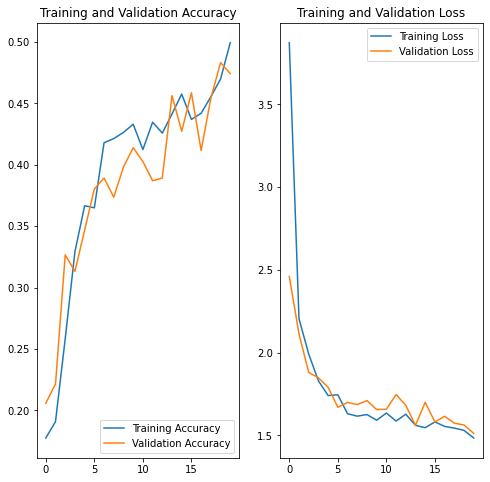

In [22]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### INFERENCES :    
- As we can see that the __difference between the training accuracy and validation accuracy__ has been shrinked compared to previous model and also it is maintained along every epochs.
- Thus __overfitting__ its handled in this model by __data augmentation__ and regularizations like __Dropout layers__ and __L2 regularizer__.
- __Training accuracy : ~ 0.49__
- __Validation accuracy : ~ 0.47__
- __Training loss : ~ 1.5956__
- __Validation loss : ~ 1.6075__
- Still, there is a scope for improvement in accuracy. Let us focus on __class imbalance issue__ and resolve it to get better accuracy and also it aids in preventing overfitting.

### DISTRIBUTION OF CLASSES IN THE TRAINING DATASET :  
- Many a times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. 
- Class imbalance can have a detrimental effect on the final model quality. 
- Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
# Create a dictionary of train data image counts with their corresponding classnames

image_count = {}
for classname in class_names:
    image_count[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))   
print(image_count)

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [24]:
# Create a dataframe for storing the image counts of respective classes

image_count_df = pd.DataFrame()
num_of_images = list(image_count.values())
image_count_df['Class name'] = class_names
image_count_df['Number of images'] = num_of_images
image_count_df

,Class name,Number of images
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


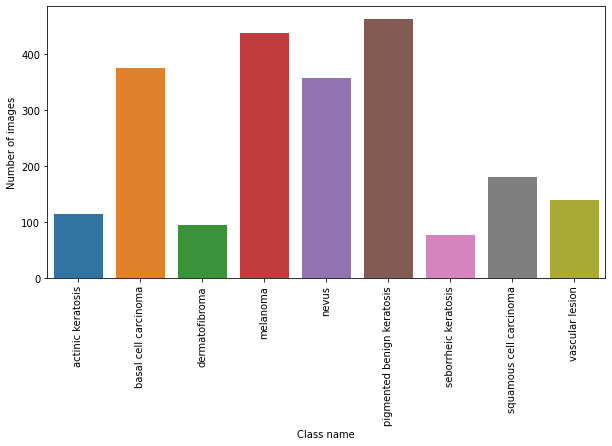

In [25]:
# Plot bar graph to interpret class imbalance in the dataset

plt.figure(figsize=(10, 5))
sns.barplot(x = image_count_df['Class name'], y = image_count_df['Number of images'], data = image_count_df)
plt.xticks(rotation=90)
plt.show()

### INFERENCES : 
- The class __"seborrheic keratosis"__ has __least__ number of samples (__77__ out of 2239).
- The class __"pigmented benign keratosis"__ dominate the train data in terms of proportionate number of samples (__462__ out of 2239)

####  We can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset = root_path+'Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20C861876D0>: 100%|█| 500/500 [00:05<00:00, 85.49 Samples/


Initialised with 376 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20CF53E7E50>: 100%|█| 500/500 [00:06<00:00, 79.67 Samples/


Initialised with 95 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20CF815FF10>: 100%|█| 500/500 [00:06<00:00, 76.69 Samples/


Initialised with 438 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x20C85AB99A0>: 100%|█| 500/500 [00:28<00


Initialised with 357 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x20C83D7BEE0>: 100%|█| 500/500 [00:24<00:00, 20.64 Sample


Initialised with 462 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20C83D3FA60>: 100%|█| 500/500 [00:05<00:


Initialised with 77 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20CF65EABE0>: 100%|█| 500/500 [00:13<00:00, 37.32 Samples


Initialised with 181 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20C842216D0>: 100%|█| 500/500 [00:05<00:


Initialised with 139 image(s) found.
Output directory set to C:/Users/gayth/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20C85B925E0>: 100%|█| 500/500 [00:05<00:00, 83.59 Samples/


__Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.<br>Lets take a look at total count of augmented images.__

In [28]:
# Total number of added new samples

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [29]:
# New path

path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list_new

In [30]:
# Respective class names

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [31]:
# Zip the paths and its corresponding labels into a dictionary

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
# Create a dataframe for storing paths and labels

df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [33]:
# Check for the number of images in each class

df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added __500 images__ to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Let us train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

### Create a new training set 

In [35]:
# TRAIN DATASET created using augmented data and original training data
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width

data_dir_train = root_path+'Train/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a new validation set

In [36]:
# VALIDATION DATASET created using augmented data and original training data
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## MODEL 3
### Create the model

In [55]:
# Let us create a new model with augmented data along with the original data

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer 
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 4th convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layer 1 with Dropout layer and l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0105)))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model

In [56]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
# View the summary of all layers

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 45, 45, 32)       

### Train the model

In [58]:
# Train the model for 30 epochs

epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
43/43 [==============================] - 16s 354ms/step - loss: 3.2703 - accuracy: 0.1307 - val_loss: 2.3972 - val_accuracy: 0.1790
Epoch 2/30
43/43 [==============================] - 16s 372ms/step - loss: 2.2434 - accuracy: 0.1700 - val_loss: 2.0185 - val_accuracy: 0.2864
Epoch 3/30
43/43 [==============================] - 17s 392ms/step - loss: 2.0083 - accuracy: 0.2843 - val_loss: 2.0261 - val_accuracy: 0.3221
Epoch 4/30
43/43 [==============================] - 17s 378ms/step - loss: 1.8626 - accuracy: 0.3393 - val_loss: 1.8139 - val_accuracy: 0.3781
Epoch 5/30
43/43 [==============================] - 17s 392ms/step - loss: 1.7527 - accuracy: 0.3489 - val_loss: 1.6052 - val_accuracy: 0.4653
Epoch 6/30
43/43 [==============================] - 17s 381ms/step - loss: 1.7066 - accuracy: 0.3630 - val_loss: 1.7143 - val_accuracy: 0.3758
Epoch 7/30
43/43 [==============================] - 17s 375ms/step - loss: 1.6573 - accuracy: 0.3779 - val_loss: 1.5213 - val_accuracy: 0.4944

### Visualize the results

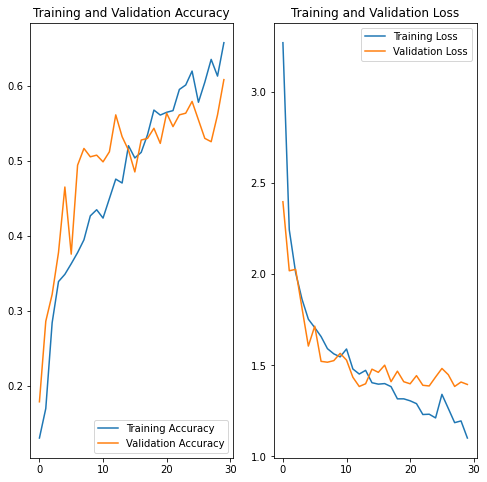

In [61]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### INFERENCES : 
- It is evident that class imbalance issue is resolved with Augmentor and we could see an improvement in accuracy.
- __Overfitting issue__ is also handled as the difference in training accuracy and validation accuracy is remarkably less. and By resolving __class imbalance issue__ and using regularizations like __dropout layers and l2 regularizers__, we obtained better accuracy.
- __Training accuracy : ~ 0.65__
- __Validation accuracy : ~ 0.60__
- Still there may be __scope for improvement__ in accuracy if we increase the __number of epochs__ or __number of layers__ in the model.
